```r
library(magrittr)
library(tidyverse)

time_steps <- 1:10
particles <- rep(0, 10000)
decay_data <- tibble::tribble(
  ~time_step, ~percent_decayed, ~percent_remaining,
  0, 0, 100
)
```

In [1]:
# Make plots inline
%matplotlib inline

# Make inline plots vector graphics instead of raster graphics
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from ggplot import aes
from ggplot import ggplot
from ggplot import geom_line

time_steps = np.linspace(
    start = 1,
    stop = 10,
    num = 10
)

particles = pd.Series(
    np.zeros(10000)
)

decay_data = pd.DataFrame({
    'time_step': [0],
    "percent_decayed": [0],
    "percent_remaining": [100]
})

```r
try_to_decay_a_particle <- function(particle) {
  decay_probability <- 0.5
  does_particle_decay <- (runif(1, 0, 1) >= decay_probability)
  if (particle == 0 && does_particle_decay) {
    particle <- 1
  }
  return (particle)
}
```

In [2]:
def try_to_decay (particle):
    decay_probability = 0.5
    does_particle_decay = np.random.random() > decay_probability
    
    if (particle == 0 and does_particle_decay):
        particle = 1
        
    return particle

def evolve_system (particles):
    return particles.map(try_to_decay)

```r
for (time_step in time_steps) {
  particles <- map_dbl(particles, try_to_decay_a_particle)
  percent_decayed <- mean(particles) * 100
  decay_data %<>% rbind(
    c(time_step, percent_decayed, 100 - percent_decayed)
  )
}

print(decay_data)
```

In [3]:
for time_step in time_steps:
    particles = evolve_system(particles)
    percent_decayed = particles.mean() * 100
    new_data = pd.DataFrame(
        {
            'time_step': [time_step],
            'percent_decayed': percent_decayed,
            'percent_remaining': (100 - percent_decayed)
        },
        index = [0]
    )
    
    decay_data = decay_data.append(new_data)

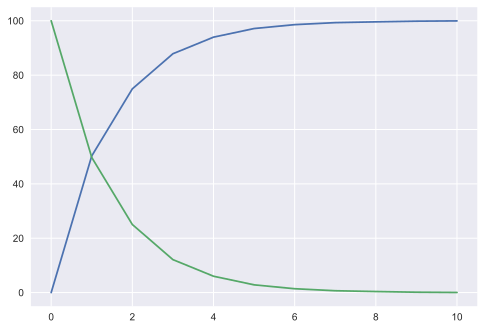

In [4]:
# decay_data.plot.line(
#     x = 'time_step',
#     y = 'percent_remaining'
# )

plt.plot(
    decay_data.time_step,
    decay_data.percent_decayed,
    decay_data.time_step,
    decay_data.percent_remaining
)

plt.show()

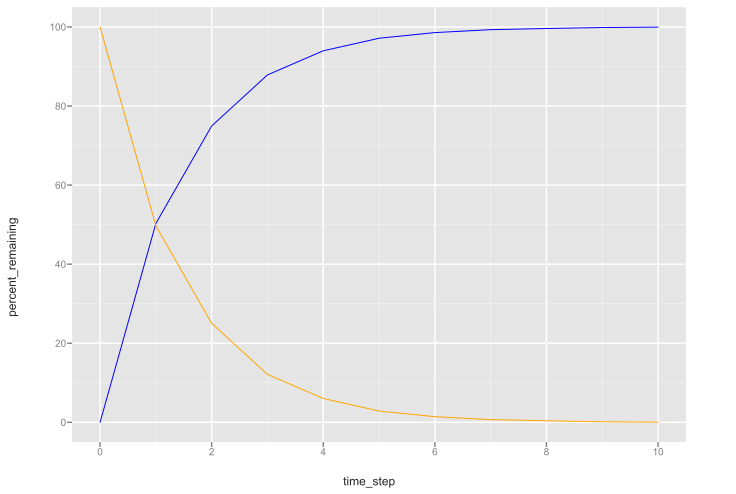

<ggplot: (274885717)>

In [5]:
(
    ggplot(
        aes(x = 'time_step', y = 'percent_decayed'),
            data = decay_data
    ) +
    geom_line(color='blue') +
    geom_line(
        aes(x = 'time_step', y = 'percent_remaining'),
        data = decay_data,
        color='orange'
    )
)